In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
warnings.filterwarnings("ignore")
from sympy import *

### The Quantum Object 


### Bra-Ket Notation

In [2]:
Qobj()

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

The base quantum object is a **bra** vector denoted by $\langle \psi|$

This is the equivalent of a 1x1 matrix with zero as the only entry.

Creating a bra vector with data using list comp:

In [3]:
x= Qobj([[x for x in range(5)]])
x

Quantum object: dims = [[1], [5]], shape = (1, 5), type = bra
Qobj data =
[[0. 1. 2. 3. 4.]]

In [4]:
y = Qobj([[y] for y in range(5)])
y

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]]

### Dot Product

***Magnitude***

In [5]:
num = x * y
num

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[30.]]

In [6]:
abs_x = (x * x.trans()).data[0]

In [7]:
abs_y = (y.trans() * y).data[0]

In [8]:
denom = (abs_x * abs_y).data[0]

In [9]:
denom = np.real(denom)

***Angle***

In [10]:
theta = np.arccos((x * y) / (denom))

In [11]:
np.real(theta)

array([[1.53745682]])

A **ket** vector, represented by $|\psi\rangle$ is the equivalent of a column vector. In this notation, we have created a 1x5 column vector.

- qtip rundown

- Bra / Ket notation

- Commutators

- Spin

- tunneling

- Hilbert Space

- Back prop parameters


A random vector, really an **operator**

In [12]:
r = np.random.rand(4,4)
r

array([[0.47854547, 0.47086053, 0.96381733, 0.82569489],
       [0.73478173, 0.45397728, 0.562101  , 0.09086029],
       [0.23376889, 0.92795554, 0.57047685, 0.93380364],
       [0.81064611, 0.29359297, 0.05714462, 0.8050399 ]])

In [13]:
Qobj(r)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.47854547 0.47086053 0.96381733 0.82569489]
 [0.73478173 0.45397728 0.562101   0.09086029]
 [0.23376889 0.92795554 0.57047685 0.93380364]
 [0.81064611 0.29359297 0.05714462 0.8050399 ]]

### Creating a Hilbert Space

### fock state operator

- The equivalent of a particle selector operator $\hat{N}_{k}$ where $\sum_{i}\hat{N}_{k_{i}}$ = $\hat{N}$ (the total number of particles in a system).

In [14]:
basis(10, 3)

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In multi-dimensional space:

In [15]:
fock_dm(10, 3)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

### Operator Example

***Destruction Operator***

The lowering operator, removes elements of a matrix below a particular ground state. It is particularly useful for the case of the Quantum Harmonic Oscillator.

In [16]:
d = destroy(4)

In [17]:
d.data

<4x4 sparse matrix of type '<class 'numpy.complex128'>'
	with 3 stored elements in Compressed Sparse Row format>

***Sparse matrices are the default storage type***

In [18]:
d

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.        ]
 [0.         0.         1.41421356 0.        ]
 [0.         0.         0.         1.73205081]
 [0.         0.         0.         0.        ]]

### Matrix Mathematics 

- Adding constants

In [19]:
d + 5

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[5.         1.         0.         0.        ]
 [0.         5.         1.41421356 0.        ]
 [0.         0.         5.         1.73205081]
 [0.         0.         0.         5.        ]]

adding or subtracting a constant *a* is the equivalent of adding/subtracting $a\hat{I}$ where $\hat{I}$ is the identity matrix.

- Multiplication follows the normal definition of the inner (dot) product

In [20]:
spin_operator = sigmax()

In [21]:
spin_operator

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [22]:
spin_operator * spin_operator

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

In Bra-Ket notation the inner product is simplified:

$$\langle\psi_{a} | \psi_{b}\rangle$$

Represents the inner product of two vectors, a **bra** on the left and a **ket** on the right.

- Chained dot product

In [23]:
d ** 3

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         2.44948974]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]

Is the equivalent of:

In [24]:
d * d * d

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         2.44948974]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]

### Operations on Quantum Objects

Support exists for a variety of handy linear algebra functions such as eigenvalues, eigenvectors, diagonals, traces, hermitian conjugation etc.

In [25]:
space = basis(8, 1)
space

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

The adjoint operator $\dagger\$, often referred to as the **dagger** operator takes the transpose of a matrix.

In [26]:
space.dag()

Quantum object: dims = [[1], [8]], shape = (1, 8), type = bra
Qobj data =
[[0. 1. 0. 0. 0. 0. 0. 0.]]

- Diagonals

In [27]:
coherent_density_matrix = coherent_dm(5,1)
coherent_density_matrix

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.36791117 0.36774407 0.26105441 0.14620658 0.08826704]
 [0.36774407 0.36757705 0.26093584 0.14614018 0.08822695]
 [0.26105441 0.26093584 0.18523331 0.10374209 0.06263061]
 [0.14620658 0.14614018 0.10374209 0.05810197 0.035077  ]
 [0.08826704 0.08822695 0.06263061 0.035077   0.0211765 ]]

In [28]:
coherent_density_matrix.diag().sum()

1.0

- Ladder op example

#### Distance metrics for determining how close to density matrix distributions are to each other

- Trace Distance

- fidelity

- Hilbert-Schmidt distance

- Bures-distance

- Bures angle

- Hellinger distance

***Comparisons of train/test splits for distributions?***

### Quantum Mechanics:

Easy stuff first! 

#### The Time Dependent Schroedinger Equation:

$$i\hbar \frac{\partial \Psi}{\partial t} = -\frac{\hbar^2}{2m}
\frac{\partial^2 \Psi}{\partial x^2} + V \Psi$$

This equation is a PDE, where the wavefunction $\Psi(\hat{r}, t)$ is function of both position and time. 

The Hamiltonian operator $\hat{H}$ represents the classical total energy of a quantum system (Kinetic + Potential).

In operator form:

$$\hat{H}\Psi=E\ \Psi$$

By assuming that the wave function can be expressed as the product of two functions, $\psi(\hat{r})$ and $\phi(t)$, separation of variables can be employed and the separation constant C of the time independent equation represents the allowed energies (eigenenergies) of the operator $\hat{H}$.

It is often favorable to represent the operator $\hat{H}$ in terms of its **eigenvectors** where the resultant matrix consists of all off-diagonal elements equal to zero and the diagonal formed by the eigenenergies.

The eigenstates of the 1-Dimension Quantum Well are a set of even and odd solutions given the quantum number **n**:

$$\psi_{n}(x) = \sqrt{\frac{2}{L}}\sin(k_{n}x)
        for\ n\ even\$$
        
        
$$\psi_{n}(x) = \sqrt{\frac{2}{L}}\cos(k_{n}x)
        for\ n\ odd\$$
        
        
$$k_{n}=\frac{n\pi}{L}$$

In [72]:
[y for y in n(0,1,501)]

[0]

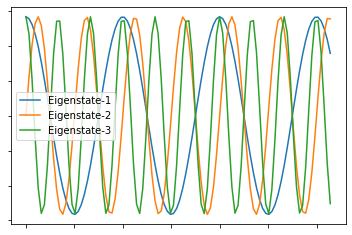

In [118]:
#plot the eigenstates of a 1-d quantum well
L = 1e-9
for n in range(1, 4, 1):
    p = sns.lineplot(
        x=[x for x in np.linspace(0, 2 * np.pi, 100)],
        y=[wave_function(n).calc(x) for x in np.linspace(0, 2 * np.pi, 100)],
        label=f'Eigenstate-{n}')
    p.set_xticklabels(['' for x in p.get_xticks()])
    p.set_yticklabels(['' for x in p.get_yticks()])

In [92]:
class wave_function():
    def __init__(self, n=2, L=1):
        self.n = n
        self.L = L
        self.k = (n * np.pi)/L
    def calc(self, x):
        if self.n % 2 == 0:
            return np.sqrt(2/self.L)*np.sin(self.k*x)
        else:
            return np.sqrt(2/self.L)*np.cos(self.k*x)
        

In [101]:
wave_function(n=5).calc(np.pi)

0.8596136900349822

In [94]:
x

In [95]:
x.calc(np.pi)

0.8596136900349822